<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/%ED%8A%B8%EB%A6%AC%EC%99%80%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install xgboost
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.3 MB/s eta 0:00:00
   ━━━━

## 앙상블
* 단어 그대로 여러 단순한 모델을 결합하여 정확한 모델을 만드는 방법

### 데이터 분류
* 정형데이터 : 지금까지 학습한 수치자료가 있는 값
* 비정형데이터 : 데이터베이스타 엑셀로 표현하기 어려운 데이터(텍스트데이터, 디카사진, mp3 등) -> 신경망 알고리즘

### 랜덤포레스트
* 랜덤포레스트 : 결정 트리를 랜덤하게 만들어 결정트리(나무) 숲을 만듦 -> 최종 예측
* 1000개의 샘플이 들어있는 가방에서 100개의 샘플을 뽑을 때 1개를 뽑고 뽑았던 1개를 다시 가방에 넣음
* 중복된 샘플을 뽑을 수 있음 -> 부트스트랩 샘플이라고 함
* 부트스트랩
  * 데이터 세트에서 중복을 허용하여 데이터를 샘플링
  * bootstrap : 한번 시작되면 알아서 진행되는 일련의 과정

* 분류모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼 특성을 선택
* 즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용
* 다만 회귀모델인 RandomForestRegressor는 전체 특성을 사용


* 사이킷런의 랜덤포레스트는 기본적으로 100개의 결정트리를 이런 방식으로 훈련함
* 그 다음 분류일때는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼는다.
* 회귀일 때는 단순히 각 트리의 예측을 평균함


* 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 문제
* 회귀 : 임의의 어떤 숫자를 예측하는 문제

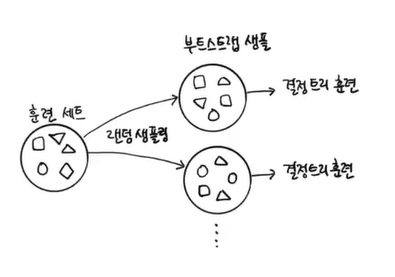

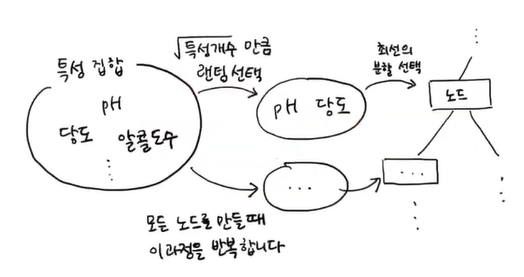

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [2]:
# 훈련세트 80%와 테스트 세트20%로 나눔
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [3]:
from sklearn.model_selection import cross_validate  # 크로스 검증용
from sklearn.ensemble import RandomForestClassifier # 100개의 결정트리 사용

rf = RandomForestClassifier(n_jobs=-1, random_state=42) # n_jobs=-1 : 모든 cpu 사용
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
# return_train_score=True :  검증점수와 훈련세트에 대한 점수도 리턴

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    # train_score : 0.9973541965122431 -> 과대적합

0.9973541965122431 0.8905151032797809


In [4]:
print(scores)
#{'fit_time': array([1.18234944, 1.44493914, 0.99615979, 0.88772583, 0.63386822]),
#'score_time': array([0.10414815, 0.0773952 , 0.06093049, 0.06132483, 0.04748154]),
#'test_score': array([0.88461538, 0.88942308, 0.90279115, 0.88931665, 0.88642926]),
#'train_score': array([0.9971133 , 0.99663219, 0.9978355 , 0.9973545 , 0.9978355 ])}

{'fit_time': array([2.09810352, 2.1699605 , 2.22121525, 2.46175122, 1.01543856]), 'score_time': array([0.1658659 , 0.11537957, 0.19296885, 0.15561652, 0.09206319]), 'test_score': array([0.88461538, 0.88942308, 0.90279115, 0.88931665, 0.88642926]), 'train_score': array([0.9971133 , 0.99663219, 0.9978355 , 0.9973545 , 0.9978355 ])}


In [5]:
# 랜덤포레스트는 결정트리의 앙상블이기 때문에 결정트리가 제공하는 중요한 매개변수를 모두 제공함
# 결정트리의 큰 장점중 하나인 특성 중요도를 계산한다.
# 랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합한 것이다.
# 훈련 후에 중요도를 출력해보자.

rf.fit(train_input, train_target)
print(rf.feature_importances_)  # 훈련 후 특성 중요도 출력

[0.23167441 0.50039841 0.26792718]


In [6]:
# 특성 중요도 비교

# 알콜도수   당도        pH
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 현재결과
# [0.12345626 0.86862934 0.0079144 ] 로지스틱회귀 (이전결과)
# 당도의 중요도가 감소하고, 알콜도수와 pH 중요도가 상승
# 이유는 랜덤포레스트가 특성 일부를 랜덤하게 선택하여 결정트리를 훈련함(중복허용)
# 하나의 특성에 과도하게 집중하지 않고 좀더 많은 특성이 훈련에 기여할 기회가 됨(과대적합을 줄임)

In [7]:
# RandomForestClassifier  기능중에 자체적으로 모델을 평가하는 점수를 얻을 수 있다.
# OOB(Out of Bag) 부트스트랩에 포함되지 않고 남은 샘플 -> 결정트리 평가용(검증세트로 활용)
# oob_score=True -> 랜덤포레스트는 각 결정트리의 OOB 점수를 평균하여 출력(oob_score_)
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)    # 교차검증 점수와 비슷한 결과를 얻음 : 0.8934
# OOB 점수를 사용하면 교차검증을 대신할 수 있어 결과적으로 훈련세트에 더 많은 샘플을 사용할 수 있음

0.8934000384837406


In [8]:
# 엑스트라 트리 : 100개의 결정트리 훈련-> 부트스트랩 샘플을 사용하지 않음(전체 훈련세트 사용)
# 대신 노드를 분할 할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할함
# 엑스트라 트리의 결정트리 splitter='random'

from sklearn.ensemble import ExtraTreesClassifier # 엑스트라 트리
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 0.9973541965122431 0.8905151032797809 --랜덤포레스트 결과(7.34s)
# 0.9974503966084433 0.8887848893166506 --엑스트라 트리 결과(5.991s)
# RandomForestClassifier와 결과가 비슷함, 대신 속도가 빠름

0.9974503966084433 0.8887848893166506


In [9]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [ ]:
# 특성 중요도 비교

# 알콜도수   당도        pH
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 현재결과
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 (이전결과)
# [0.12345626 0.86862934 0.0079144 ] 로지스틱회귀 (이전결과)
# 결정트리보다 당도에 대한 의존성이 작다.

### 그레디언트 부스팅(Gradient Boosting, 기울기)
* 깊이가 얕은 결정트리를 사용하여 이진트리의 오차를 보완하는 방식으로 앙상블
* 사이킷런의 GradientBoostingClassifier는 기본적으로 깊이가 3인 결정트리를 100개 사용
* 때문에 과대적합에 강하고 일반적인 높은 일반화 성능을 기대함

* Gradident는 경사하강법을 사용하여 트리를 앙상블에 추가함
* 분류 : 로지스틱 손실함수, 회귀에서는 평균제곱오차함수를 사용
* 경사하강법 손실함수를 산으로 정의하고 가장 낮은곳으로 찾아내려오는 과정

* 가장 낮은곳으로 내려오는 방법은 모델의 가중치와 절편을 조금씩 바꾸는 것
* 결정트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동, 손실함수의 낮은 곳으로 천천히 이동



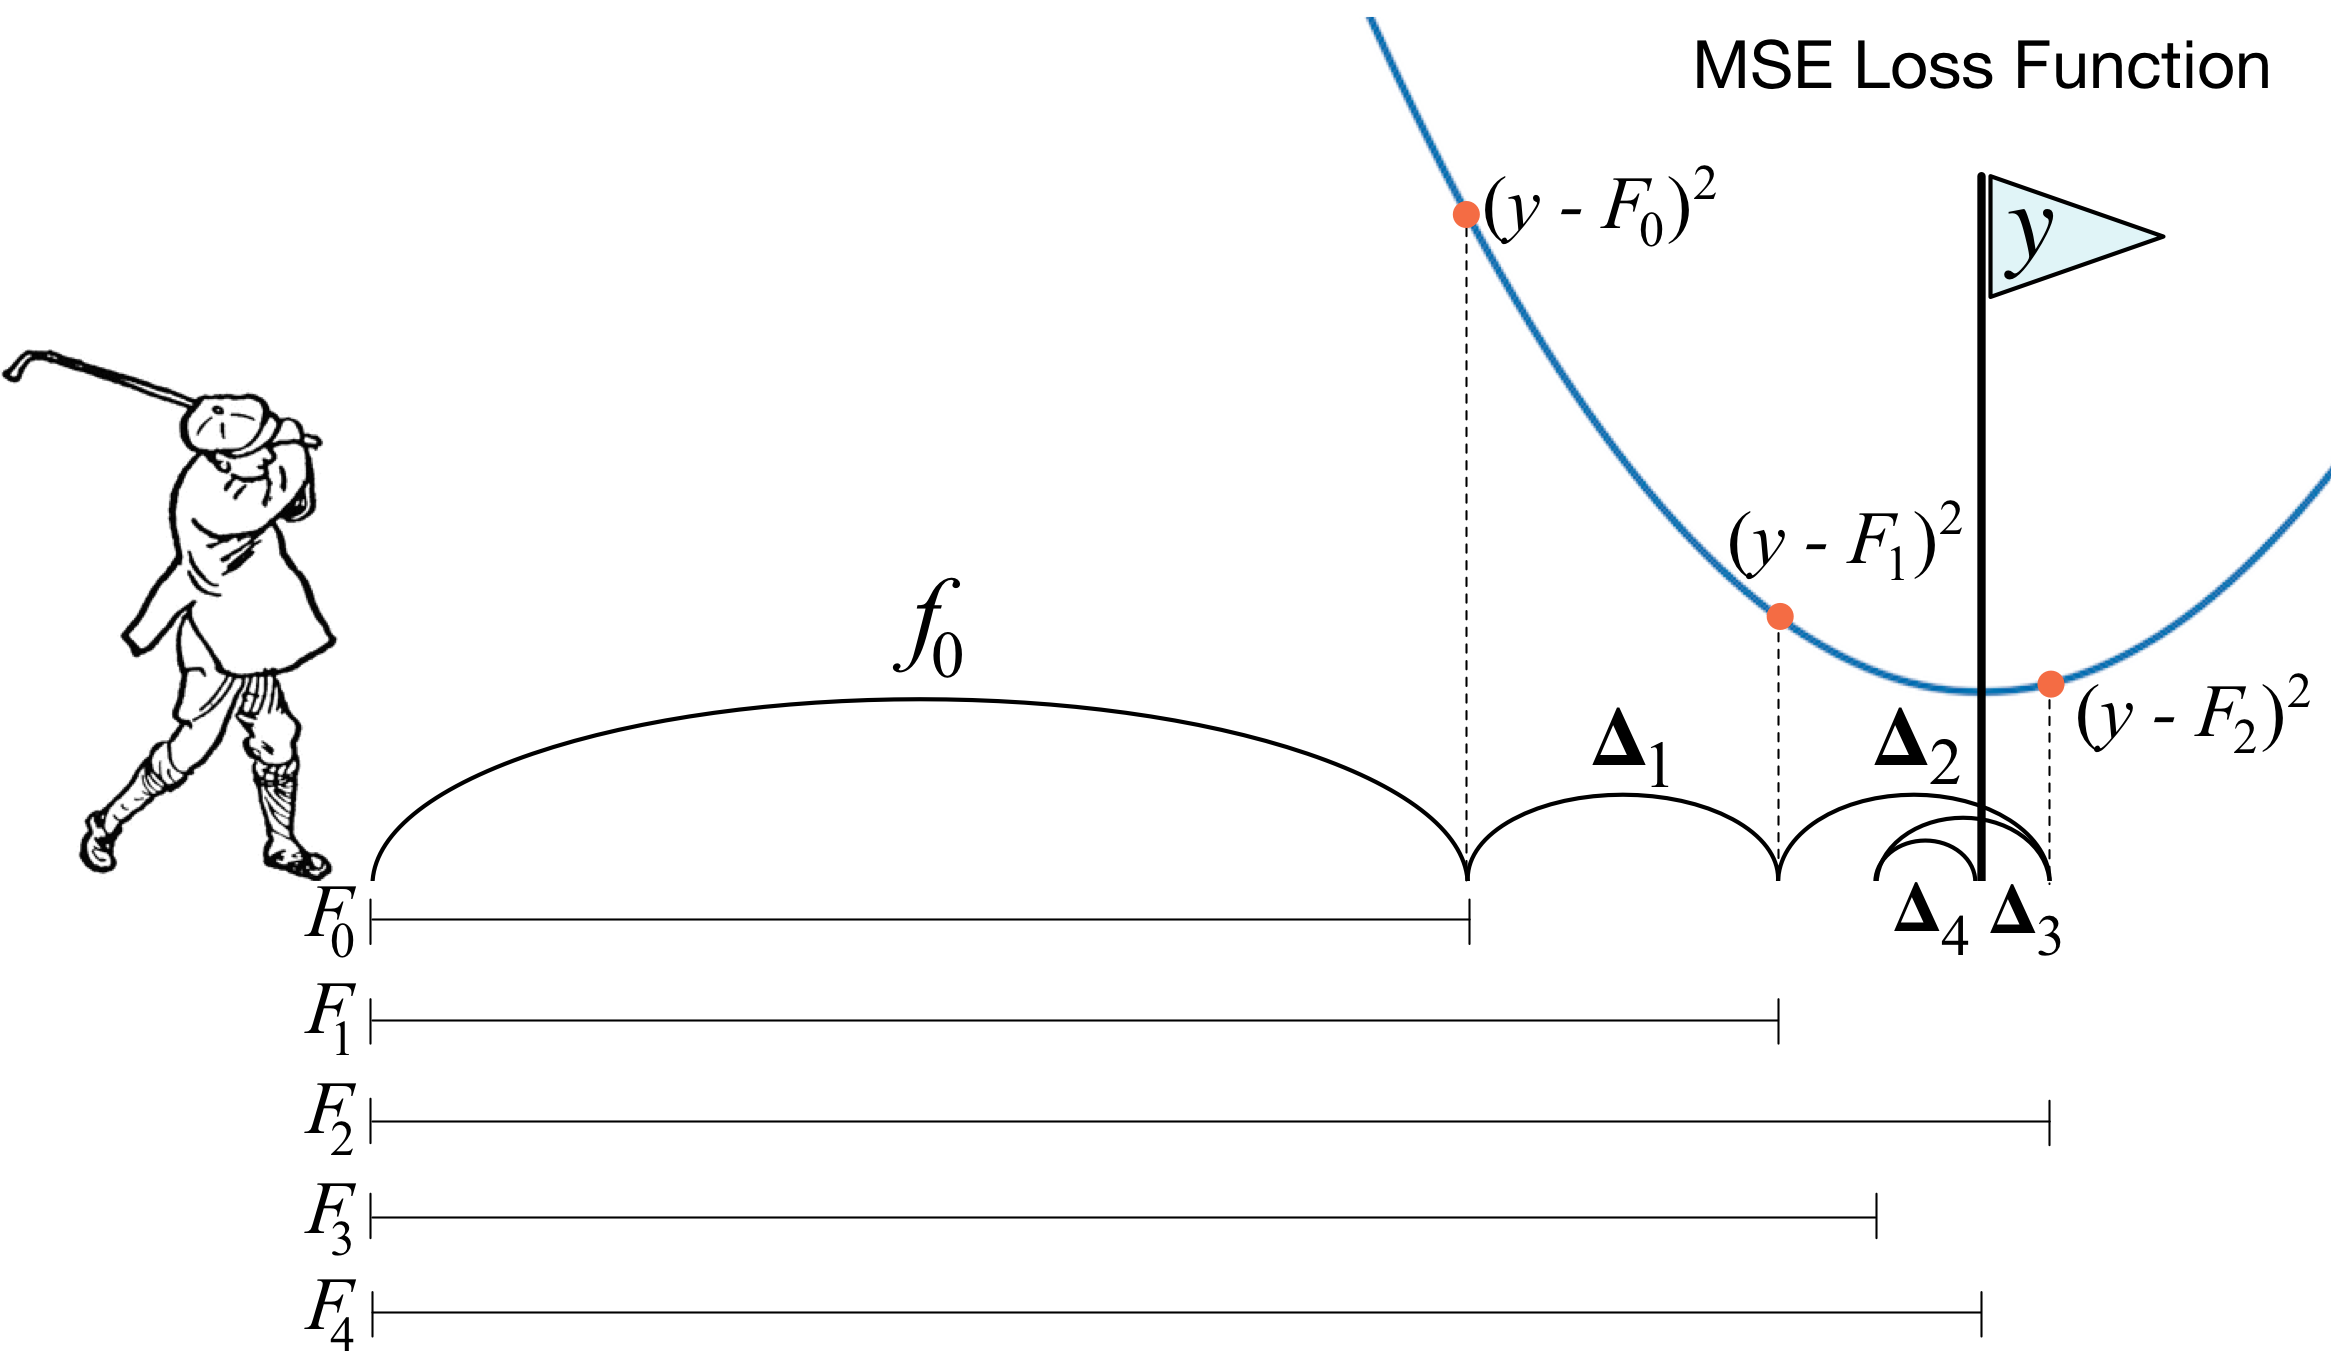

In [10]:
from sklearn.ensemble import GradientBoostingClassifier # 그래디언트 부스팅

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 0.8881086892152563 0.8720430147331015 -> 과대적합 해결

0.8881086892152563 0.8720430147331015


In [11]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
# n_estimators=500 결정트리개수를 500개로 늘림(기본값 100)
# learning_rate=0.2 학습률(기본값 0.1)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))  # 교차검증 점수 확인
# 0.9464595437171814 0.8780082549788999 -> 94.64% / 87.80% 훈련과 검증 점수 차이가 10% 이상 나지 않으면 괜찮음(과대적합 아님)

0.9464595437171814 0.8780082549788999


In [12]:
gb.fit(train_input, train_target)   #훈련시작
print(gb.feature_importances_)  # 특성에 대한 중요도 파악

[0.15887763 0.6799705  0.16115187]


In [13]:
# 특성 중요도 비교

# 알콜도수   당도        pH
# [0.15887763 0.6799705  0.16115187] 현재결과
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 (이전결과)
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 (이전결과)
# [0.12345626 0.86862934 0.0079144 ] 로지스틱회귀 (이전결과)

# train_score가 90대-> 당도에 대한 의존도가 높다!

In [ ]:
# 그레디언트 부스팅이 랜덤포레스트보다 조금 더 높은 성능이 있다.
# 하지만 순서대로 트리를 추가하기 때문에 훈련속도가 느리다.(6.259s)
# GradientBoostingClassifier 에는 n_jobs=-1 매개값이 없다.(구형모델이기 때문)

### 히스토그램기반 그라디언트 부스팅(Histogram Gradient)
* 그라디언트 부스팅의 개선버전
* 입력특성을 256 구간으로 나눔-> 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다.
* 특히 256 구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용함
* HistGradientBootsingClassifier는 기본 매개변수에서 안정적인 성능을 얻을 수 있다.
* HistGradientBootsingClassifier에는 트리의 개수를 지정하는데 n_estimators 대신 max_iter를 사용함(성능향상용)

In [14]:
# from sklearn.experimental import enable_hist_gradient_boosting 아직 개발중
from sklearn.ensemble import HistGradientBoostingClassifier #분류용
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 93.21%, 88.01% -> 과대적합 억제 성공

0.9321723946453317 0.8801241948619236


In [15]:
from sklearn.inspection import permutation_importance # 특성 중요도 확인
# 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화되는지 관찰
# 히스토그램 기반의 훈련을 진행 -> 훈련세트에서 특성 중요도를 계산해보자.
hgb.fit(train_input, train_target)
# n_repeats=10 랜덤하게 섞을 수 있는 횟수(기본 5)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [16]:
# 이번에는 테스트 세트에 결과를 확인해 보자.
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)
# 테스트 세트에서 특성 중요도


[0.05969231 0.20238462 0.049     ]


In [ ]:
# 특성 중요도 비교

# 알콜도수   당도        pH
# [0.05969231 0.20238462 0.049     ] 히스토그램 - 테스트세트
# [0.08876275 0.23438522 0.08027708] 히스토그램 현재결과
# [0.15887763 0.6799705  0.16115187] 그라디언트 부스팅(이전결과)
# [0.20183568 0.52242907 0.27573525] 엑스트라 트리 (이전결과)
# [0.23167441 0.50039841 0.26792718] 랜덤포레스트 (이전결과)
# [0.12345626 0.86862934 0.0079144 ] 로지스틱회귀 (이전결과)

In [18]:
# HistGradientBootsingRegressor 히스토그램 기반 그라디언트 부스팅의 회귀버전
# 사이킷 말고도 그라디언트 부스팅 알고리즘을 구현한 라이브러리가 다수 존재
# XGBoost : 대표적임 ->크로스검증이 가능

from xgboost import XGBClassifier
#tree_method='hist' 히스토그램 기반 그라디언트 부스팅용

xgb = XGBClassifier(tree_method='hist', random_state=42)
# cv = KFold(n_splits=10, shuffle=True, random_state=42)
scrores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    # 93.21% / 88.01%(2번 실행함)

0.9321723946453317 0.8801241948619236


In [21]:
# LGBMClassifier : MS에서 만든 LightGBM^2
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
